# Hotel Booking Demand - Starter

taken from https://www.kaggle.com/jessemostipak/hotel-booking-demand#hotel_bookings.csv

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [376]:
data = pd.read_csv('hotel_bookings.csv')

In [377]:
def explore(data):
    summaryDf = pd.DataFrame(data.dtypes, columns=['dtypes'])
    summaryDf = summaryDf.reset_index()
    summaryDf['Name'] = summaryDf['index']
    summaryDf['Missing'] = data.isnull().sum().values
    summaryDf['Total'] = data.count().values
    summaryDf['MissPerc'] = (summaryDf['Missing']/data.shape[0])*100
    summaryDf['NumUnique'] = data.nunique().values
    summaryDf['UniqueVals'] = [data[col].unique() for col in data.columns]
    print(summaryDf.head(30))

In [378]:
explore(data)

                             index   dtypes                            Name  \
0                            hotel   object                           hotel   
1                      is_canceled    int64                     is_canceled   
2                        lead_time    int64                       lead_time   
3                arrival_date_year    int64               arrival_date_year   
4               arrival_date_month   object              arrival_date_month   
5         arrival_date_week_number    int64        arrival_date_week_number   
6        arrival_date_day_of_month    int64       arrival_date_day_of_month   
7          stays_in_weekend_nights    int64         stays_in_weekend_nights   
8             stays_in_week_nights    int64            stays_in_week_nights   
9                           adults    int64                          adults   
10                        children  float64                        children   
11                          babies    int64         

In [379]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

TODOs:
* check fluctuation in demand with date
* check year on year changes
* hotel type and its effect on parameters
* stays in weekend/weekday wrt family size
* 

In [380]:
data['date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'].astype(str) + '-' + data['arrival_date_day_of_month'].astype(str))

In [381]:
data.date.value_counts()

2015-12-05    448
2016-11-07    366
2015-10-16    356
2016-10-13    344
2015-09-18    340
             ... 
2015-12-15     29
2015-11-15     28
2015-12-07     27
2015-11-29     20
2015-12-13     19
Name: date, Length: 793, dtype: int64

In [382]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


Checking number of bookings with respect to the year in question.

Looking at correlations

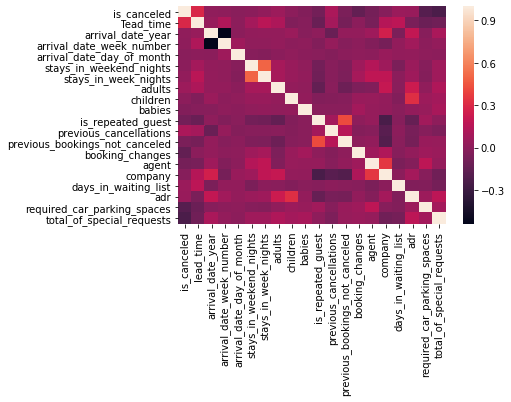

In [383]:
sns.heatmap(data.corr())

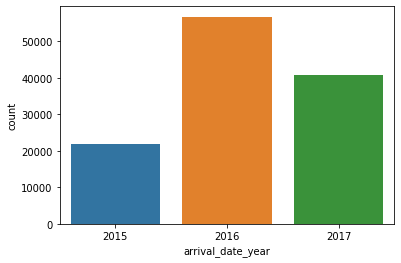

In [384]:
sns.countplot(data.arrival_date_year)

Extending this to see the common portions. Only month that is common for all 3 years is July.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

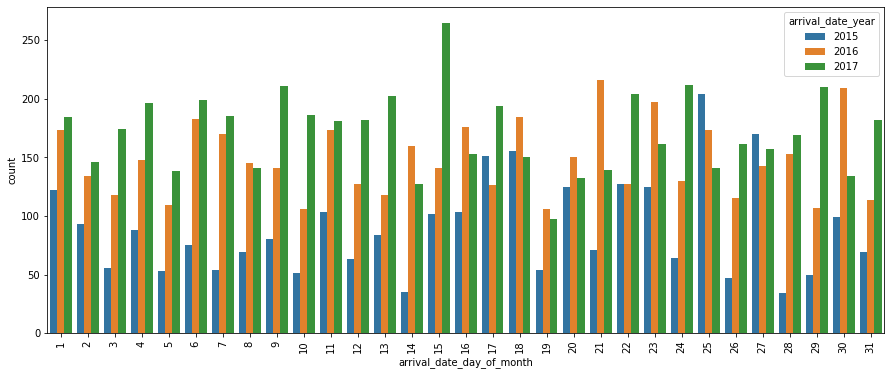

In [385]:
data_july = data.loc[data.arrival_date_month=='July']
plt.figure(figsize=(15,6))
sns.countplot(data_july.arrival_date_day_of_month, hue=data_july.arrival_date_year)
plt.xticks(rotation=90)

Looks like an overall increase in the number of bookings year on year. Let's group by the year and make sure.

Taking the 'class' column, here being hotel, we can see how there's been a steady year on year increase of:

In [386]:
pct_change = pd.DataFrame(data_july.groupby(['arrival_date_year'])['hotel'].count())
pct_change['pct_change'] = data_july.groupby(['arrival_date_year'])['hotel'].count().pct_change() * 100
pct_change

,hotel,pct_change
arrival_date_year,,
2015,2776,NaN
2016,4572,64.697406
2017,5313,16.207349


A percentage increase of 64.7% between 2015 and 2016, with 16.2% seen between 2016 and 2017. Why such a large change? Let's see if we can find out why by looking at the places that people were visiting from.

A better view of the split by country

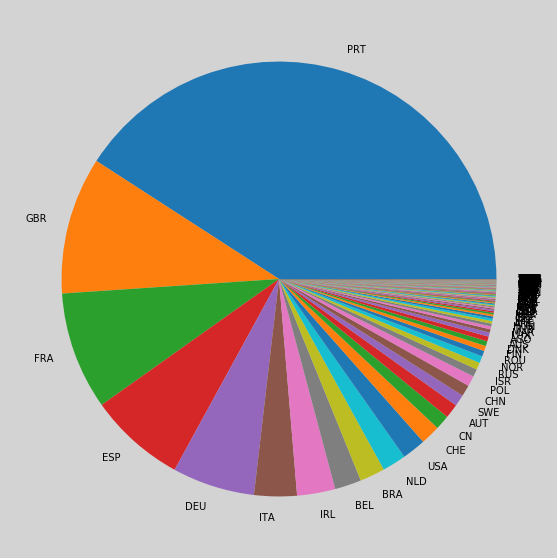

In [387]:
fig = plt.figure(figsize=(20,10))
plt.pie(data['country'].value_counts(), labels=data['country'].value_counts().index)
fig.set_facecolor('lightgrey')
plt.show()

## Grouping by country and hotel type

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107]),
 <a list of 108 Text xticklabel objects>)

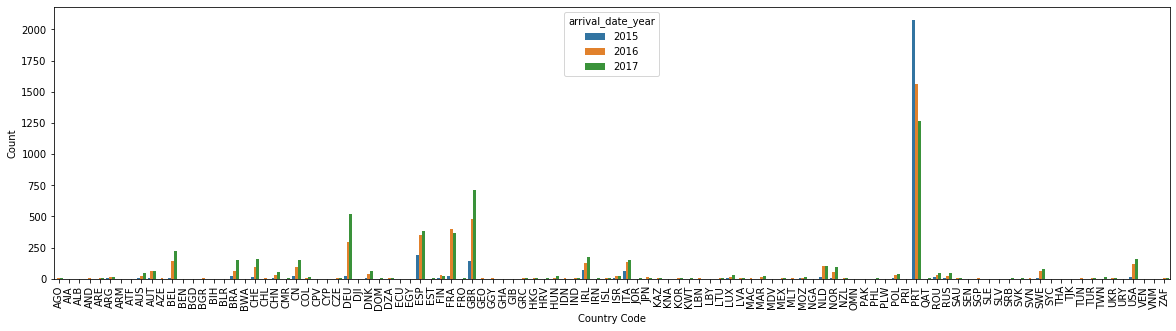

In [388]:
df_bycountry = data_july.groupby(['country', 'arrival_date_year']).size().reset_index(name='counts')
plt.figure(figsize=(20,5))
sns.barplot(data=df_bycountry, x='country', y='counts', hue='arrival_date_year')
plt.ylabel('Count')
plt.xlabel('Country Code')
plt.xticks(rotation=90)

Interestingly, there is an increase in visitors per country across the board. That is, apart from Portugal (PRT), which has seen quite worrying declining numbers. Why?

Let's try doing the same thing, but this time taking into consideration the different hotel types (City Hotel and Resort Hotel).

In [389]:
int_df = data_july.loc[data_july.country.isin(['PRT', 'GBR', 'ESP', 'DEU', 'FRA', 'BEL', 'IRL', 'ITA', 'USA', 'CHE'])]
df_by_country_hotel = int_df.groupby(['country', 'arrival_date_year', 'hotel']).size().reset_index(name='counts')

Text(0.5, 1.0, 'City Hotel')

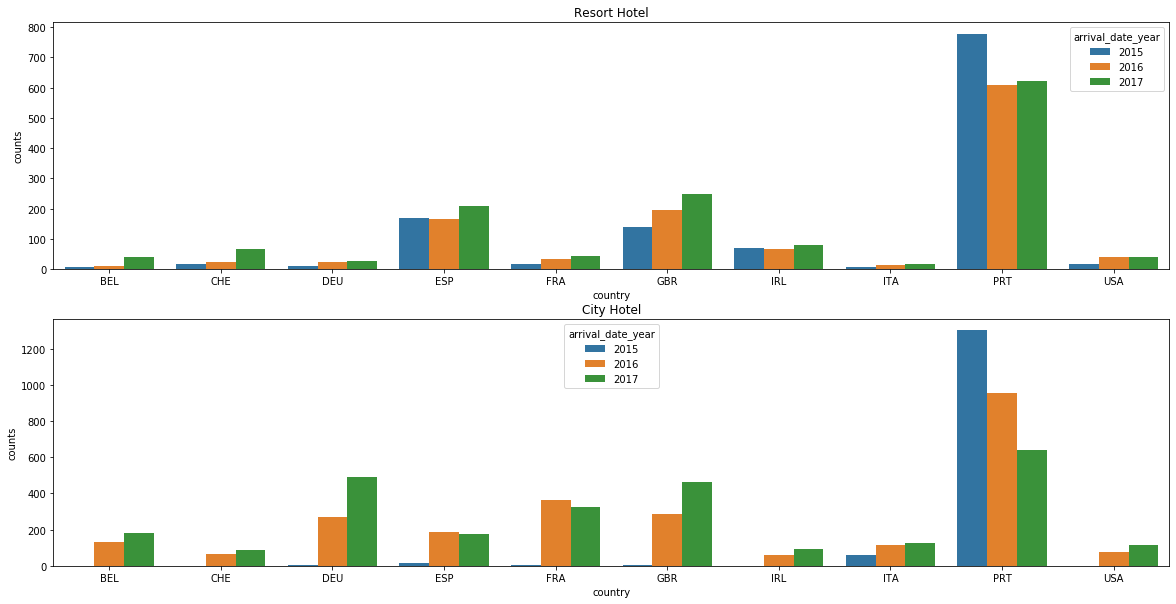

In [390]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
ax1 = sns.barplot(data=df_by_country_hotel.loc[df_by_country_hotel.hotel=='Resort Hotel'], x='country', y='counts', hue='arrival_date_year')
ax1.set_title('Resort Hotel')
plt.subplot(2,1,2)
ax2 = sns.barplot(data=df_by_country_hotel.loc[df_by_country_hotel.hotel=='City Hotel'], x='country', y='counts', hue='arrival_date_year')
ax2.set_title('City Hotel')

No surprises there, Portugal having the largest portion of visitors to the hotel. Interestingly, the decrease in Portugal's visitors can mostly be seen in the visitors that stayed at the city hotel, with the resort hotel's visitors remaining somewhat constant for PRT while increasing steadily elsewhere.

## Plotting on a week by week basis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 <a list of 53 Text xticklabel objects>)

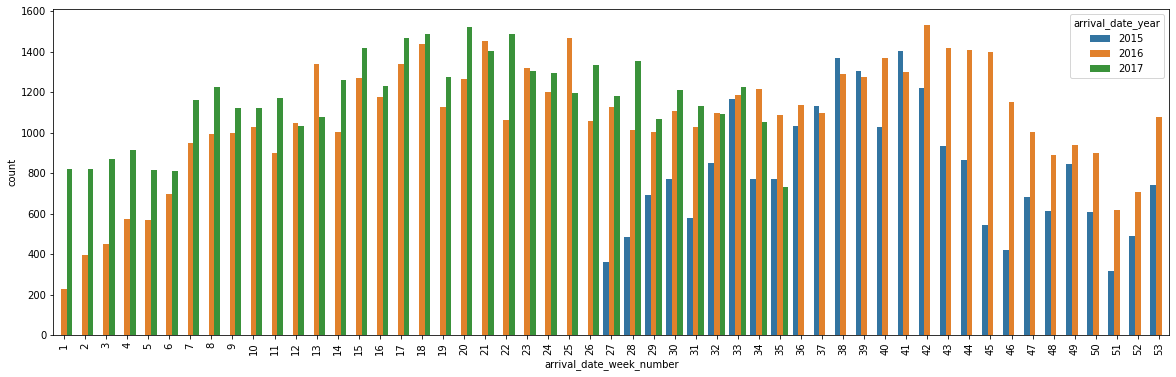

In [391]:
plt.figure(figsize=(20,6))
sns.countplot(data.arrival_date_week_number, hue=data.arrival_date_year)
plt.xticks(rotation=90)

## Looking at lead time

In [392]:
data['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

on average, 104 days pass between the booking and the client checking into the hotel

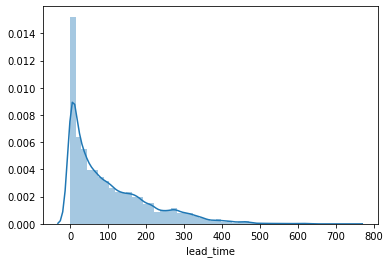

In [393]:
sns.distplot(data['lead_time'])

But the majority (~50%) are booked within 69 days from the travel date. Is there a relationship between the country of origin and the amount of lead time. 

In [394]:
data_time = data[['country', 'lead_time']]

Take 2 countries, 1 being far away from the assumed location of the hotel (USA) with the other being somewhere closeby. In this case NLD was chosen since it has a comparable number of occurrances in the dataset w.r.t. USA.

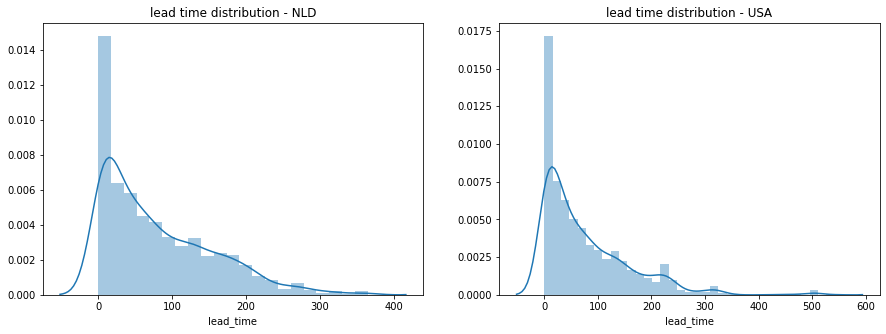

In [395]:
data_nld = data_time.loc[data_time.country=='NLD']
data_usa = data_time.loc[data_time.country=='USA']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax1=sns.distplot(data_nld['lead_time'])
ax1.set_title('lead time distribution - NLD')
plt.subplot(1,2,2)
ax2=sns.distplot(data_usa['lead_time'])
ax2.set_title('lead time distribution - USA')
plt.show()

They have comparable distributions. Maybe it's because a direct flight can be booked (and it's easier)(assumption) from the US to the hotel location. Trying the same thing now comparing a country farther away, such as China and another european country, austria (picked due to nearly same number of occurrances).

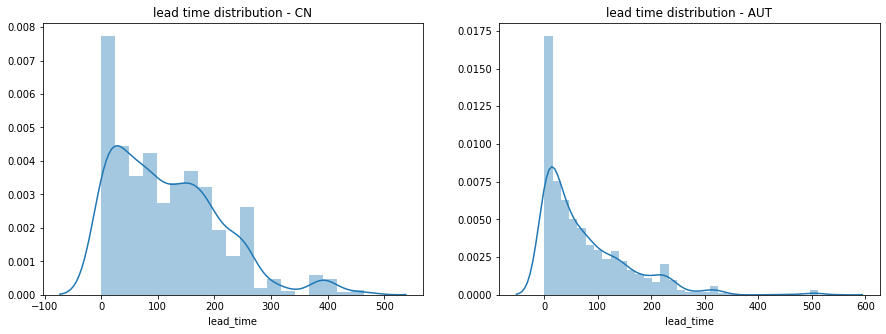

In [396]:
data_cn = data_time.loc[data_time.country=='CN']
data_aut = data_time.loc[data_time.country=='AUT']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax1=sns.distplot(data_cn['lead_time'])
ax1.set_title('lead time distribution - CN')
plt.subplot(1,2,2)
ax2=sns.distplot(data_usa['lead_time'])
ax2.set_title('lead time distribution - AUT')
plt.show()

It seems like no matter the distance, people usually book around 3 months prior to a holiday. That goes to show how easy travel has become nowadays.

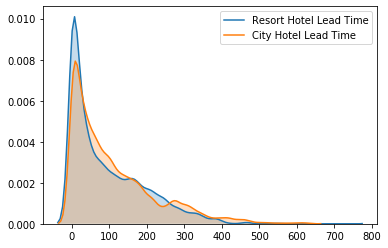

In [397]:
labels = ['Resort Hotel Lead Time', 'City Hotel Lead Time']
plt.figure()
sns.kdeplot(data.loc[data.hotel=='Resort Hotel', 'lead_time'], shade=True)
sns.kdeplot(data.loc[data.hotel=='City Hotel', 'lead_time'], shade=True)
plt.legend(labels)

From the plot and stats, a customer is more likely to book the resort hotel closer to the holiday date than the city hotel (20 day difference on average). This could be for a number of reasons. The first thing that comes to mind is that if a customer wants to go to a resort, usually (assumption), they will stay within the resort and enjoy the holiday there. On the other hand, a city hotel stay usually involves a greater level of planning due to the customer wanting to see the surrounding area (city).

Now lets look at the same type of plot but this time for the total number of nights spent on holiday

In [398]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

In [399]:
data.groupby(['total_nights', 'hotel']).size().reset_index(name='counts')

,total_nights,hotel,counts
0,0,City Hotel,331
1,0,Resort Hotel,384
2,1,City Hotel,13272
3,1,Resort Hotel,7748
4,2,City Hotel,21426
...,...,...,...
71,49,City Hotel,1
72,56,Resort Hotel,2
73,57,City Hotel,1
74,60,Resort Hotel,1


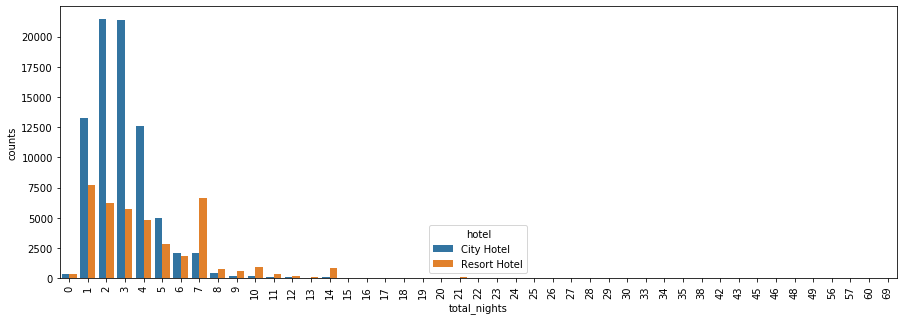

In [400]:
data_tn = data.groupby(['total_nights', 'hotel']).size().reset_index(name='counts')
plt.figure(figsize=(15,5))
sns.barplot(x='total_nights', y='counts', hue='hotel', data=data_tn)
plt.xticks(rotation=90)
plt.show()

Majority of bookings for the city hotel are short stays, 4-5 nights. The resort hotel also sees a majority of short stays, but more people opt to go for a whole weeks worth of nights. 

## Taking a full year

In [401]:
data_yr = data.loc[data.arrival_date_year==2016]

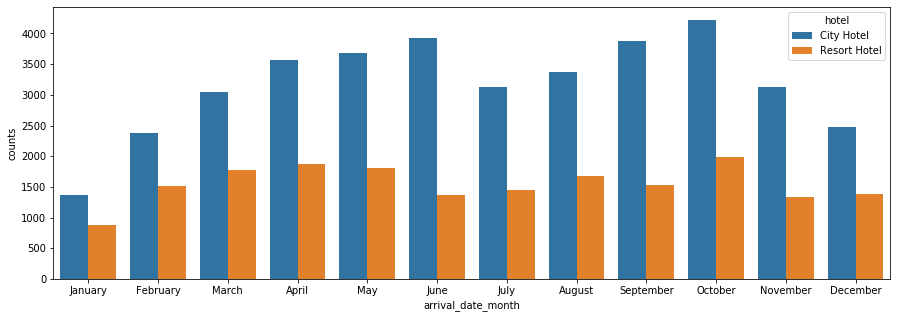

In [402]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data_yr_grp = data_yr.groupby(['arrival_date_month', 'hotel']).size().reset_index(name='counts')
plt.figure(figsize=(15,5))
sns.barplot(x='arrival_date_month', y='counts', hue='hotel', data=data_yr_grp, order=months)

## The effect of Families on the hotel choice

In [406]:
data['kids'] = data.children + data.babies

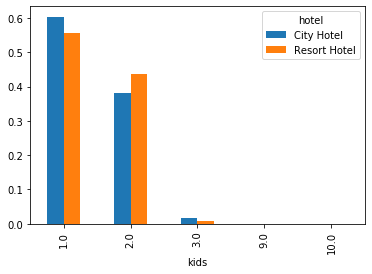

In [407]:
data_kids = data.loc[data.kids>0]
ct1 = pd.crosstab(data_kids.kids, data_kids.hotel).apply(lambda x: x/x.sum(), axis=0)
data_babies = data.loc[data.babies>0]
ct2 = pd.crosstab(data_babies.kids, data_babies.hotel).apply(lambda x: x/x.sum(), axis=0)
ct1.plot.bar()

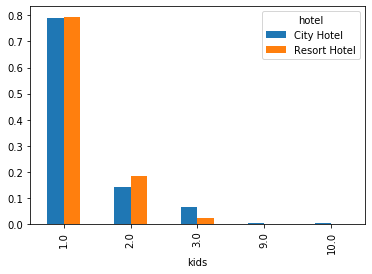

In [408]:
ct2.plot.bar()

It seems like having kids with you doesn't lead you to pick one hotel over another.

# Meal insight

Meal value definitions:
* BB - bed & breakfast
* HB - half board - breakfast and one other meal, usually dinner
* FB - beakfast, lunch and dinner
* Undefined/SC - no meal package

In [409]:
data.loc[data.meal=='Undefined', 'meal'] = 'SC'

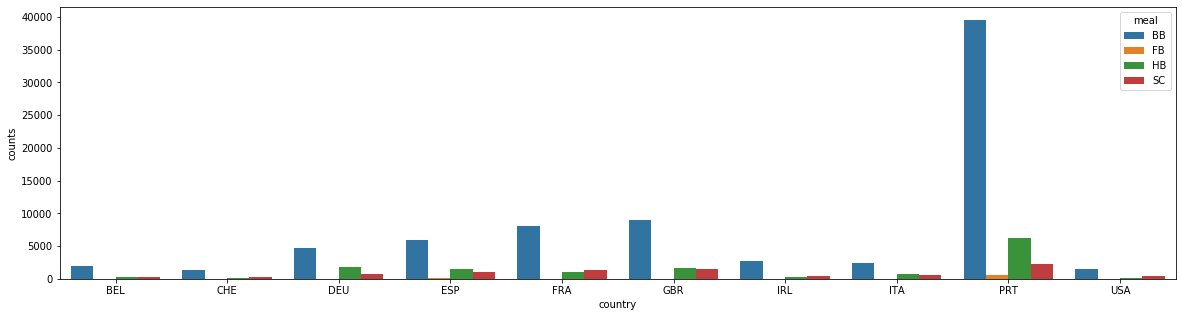

In [410]:
# taking top 10 seen countries
data_meal_tc = data.loc[data.country.isin(['PRT', 'GBR', 'ESP', 'DEU', 'FRA', 'BEL', 'IRL', 'ITA', 'USA', 'CHE'])].groupby(['country', 'meal']).size().reset_index(name='counts')
plt.figure(figsize=(20,5))
sns.barplot(data=data_meal_tc, x='country', y='counts', hue='meal')

In [411]:
perc = data.loc[data.country.isin(['PRT', 'GBR', 'ESP', 'DEU', 'FRA', 'BEL', 'IRL', 'ITA', 'USA', 'CHE'])].groupby(['country', 'meal']).size()
percbycountry = perc.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index(name='percgp')

Plotting previous as percentage of group totals

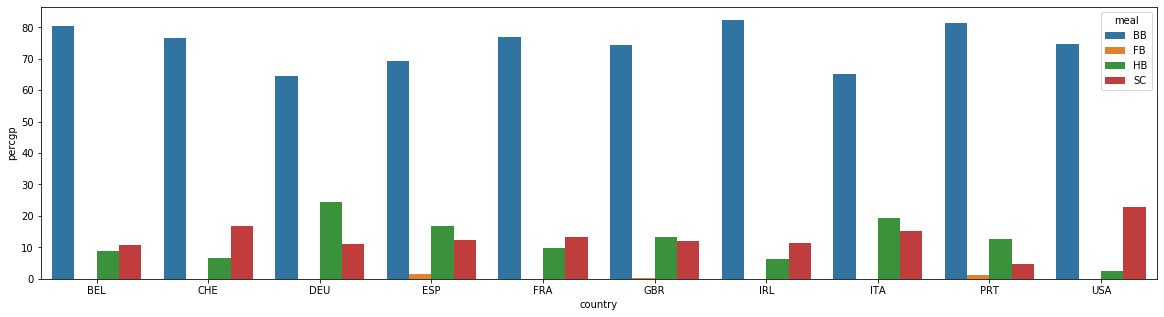

In [412]:
plt.figure(figsize=(20,5))
sns.barplot(data=percbycountry, x='country', y='percgp', hue='meal')

It seems like there is no large difference between the top 10 countries in terms of the type of meal chosen. Not splitting according to the chosen hotel to see if that has an affect.

In [413]:
perc = data.loc[data.country.isin(['PRT', 'GBR', 'ESP', 'DEU', 'FRA', 'BEL', 'IRL', 'ITA', 'USA', 'CHE'])].groupby(['country', 'hotel']).size()
percbycountry = perc.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index(name='percgp')

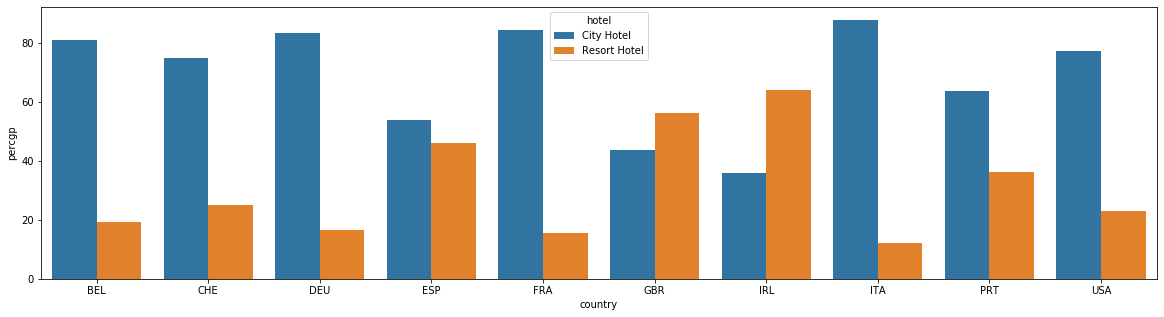

In [414]:
# looking at percentage from top 10 countries going to which hotel
plt.figure(figsize=(20,5))
sns.barplot(data=percbycountry, x='country', y='percgp', hue='hotel')

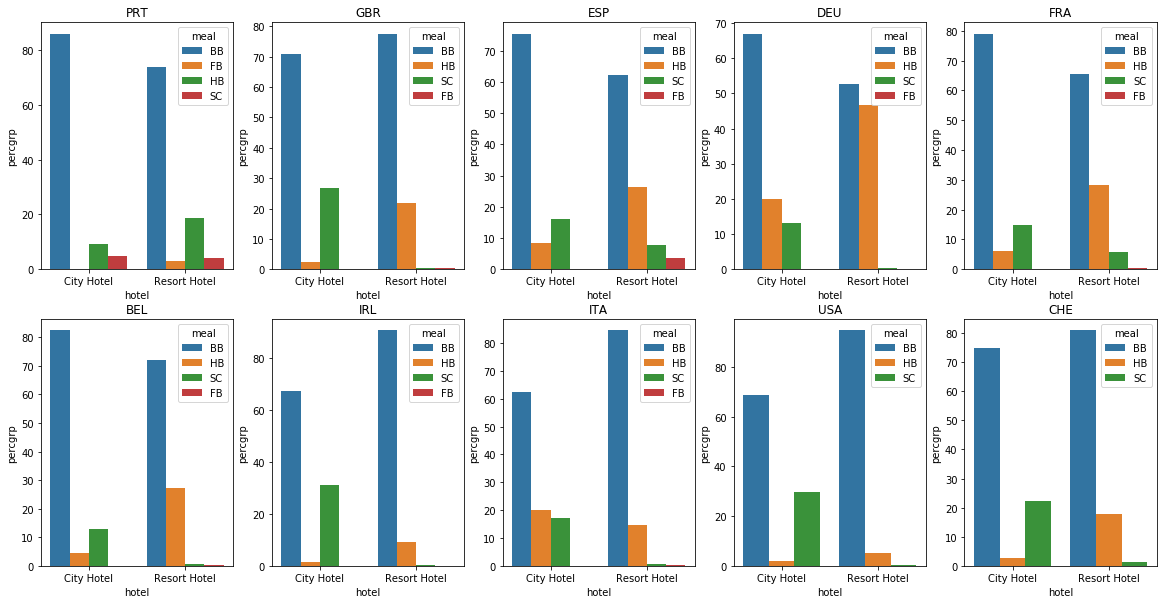

In [415]:
countries = ['PRT', 'GBR', 'ESP', 'DEU', 'FRA', 'BEL', 'IRL', 'ITA', 'USA', 'CHE']
x = 1
plt.figure(figsize=(20,10))
for country in countries:
    temp_df = data.loc[data.country==country].groupby(['hotel', 'meal']).size()
    perc = temp_df.groupby(level=0).apply(lambda x: x/float(x.sum()) * 100).reset_index(name='percgrp')
    plt.subplot(2, 5, x)
    ax = sns.barplot(data=perc, x='hotel', y='percgrp', hue='meal')
    ax.set_title(country)
    x+=1
plt.show()

Straight away we can see how the majority of clients pick the bed and breakfast option. Interestingly, people originating from Germany staying at the Resort hotel go for the half board option almost as much as bed and breakfast.

## Market Segment & Distribution Channel